#Red Wine Quality

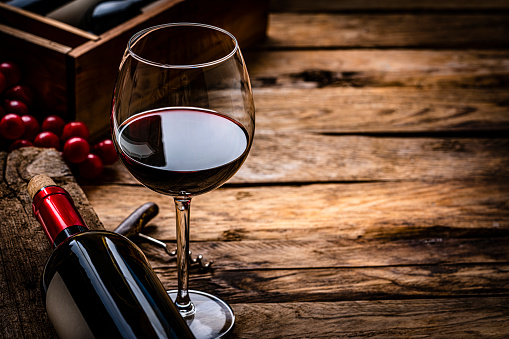

The purpose of building red wine quality classification models is to utilize data analysis techniques to predict and classify the quality of red wine based on its chemical properties and sensory attributes. As a Data Analyst, my goal is to leverage my data analysis skills and expertise to create accurate and reliable models that can be used by wine producers and consumers to identify high-quality red wines.

To achieve this goal, I will use statistical techniques to analyze and interpret large sets of data, including information about the chemical properties of red wine such as acidity, pH, and alcohol content. I will also use machine learning algorithms to develop predictive models that can accurately classify red wine quality based on these attributes. In addition to developing the models, I will also be responsible for testing their accuracy and ensuring that they meet the needs of wine producers and consumers.

##Load libraries and dataset

In [ ]:
!git clone https://github.com/evalyr/Dataset.git

fatal: destination path 'Dataset' already exists and is not an empty directory.


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

In [ ]:
df = pd.read_csv('Dataset/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


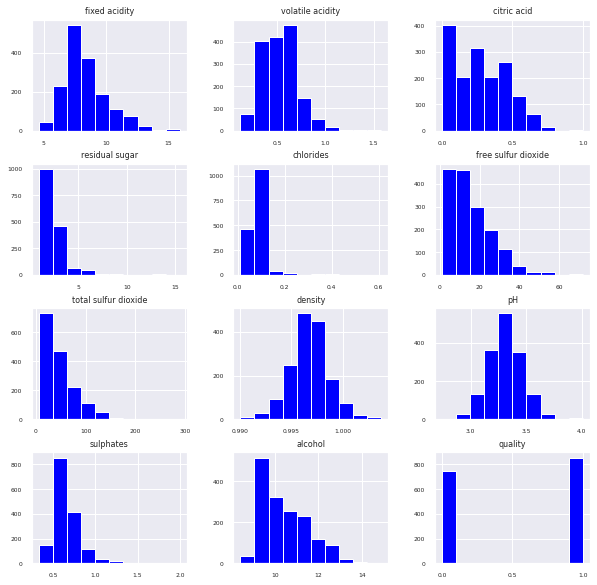

In [ ]:
sns.set()
fig = df.hist(figsize=(10,10), color='blue', xlabelsize=6, ylabelsize=6)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# Check if there's null value.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.shape

(1599, 12)

In [ ]:
# Column quality was updated after the change 3-6 not good wine, 7-8 good wine
df['quality'] = df['quality'].replace({3:0, 4:0, 5:0, 6:1, 7:1, 8:1})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<AxesSubplot:>

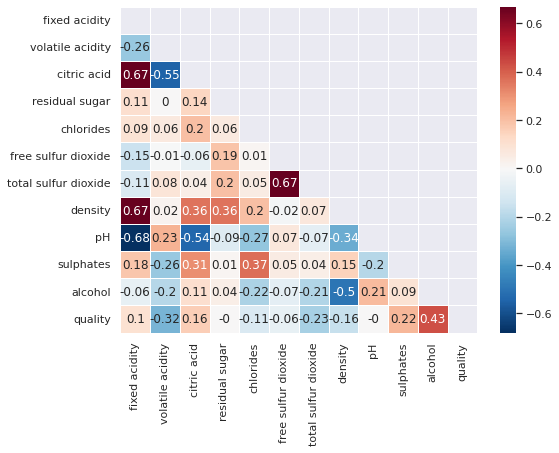

In [ ]:
# Correlation matrix
corr = round(df.corr(), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap = 'RdBu_r', linewidths = 0.8, mask = mask, annot = True)

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
print('Before Splitting:')
df.shape

Before Splitting:


(1599, 12)

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
y_train = train['quality']
X_train = train.drop(columns = ['quality'])
y_test = test['quality']
X_test = test.drop(columns = ['quality'])

In [ ]:
print('After Splitting:')
print(train.shape, test.shape)

After Splitting:
(1279, 12) (320, 12)


In [ ]:
log_reg = LogisticRegression(fit_intercept=True, max_iter=500).fit(X_train,y_train)
print(log_reg.intercept_)
print(log_reg.coef_)

[-8.93448944]
[[ 0.11025904 -2.70351077 -0.93982423  0.03594812 -0.85429042  0.02485723
  -0.01718995 -0.14018923 -0.12447186  1.9285777   0.92098273]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
log_reg_preds = log_reg.predict(X_test)

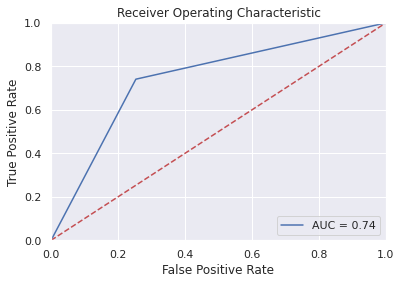

In [ ]:
fpr, tpr, threshold = roc_curve(test['quality'], log_reg_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

At first, we run a simple model as our baseline. From the Logistic Regression Model, we got an AUC value is 0.74.

##Decision Tree

In [ ]:
import graphviz
import pydot
from io import StringIO  

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

In [ ]:
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
  tree = estimator
  names = features
  color = filled
  classn = class_names
  dot_data = StringIO()
  export_graphviz(estimator, out_file=dot_data,feature_names=features,class_names=classn, filled=filled)
  graph = pydot.graph_from_dot_data(dot_data.getvalue())
  return(graph)

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
y_train = train['quality']
X_train = train.drop(columns = ['quality'])
y_test = test['quality']
X_test = test.drop(columns = ['quality'])

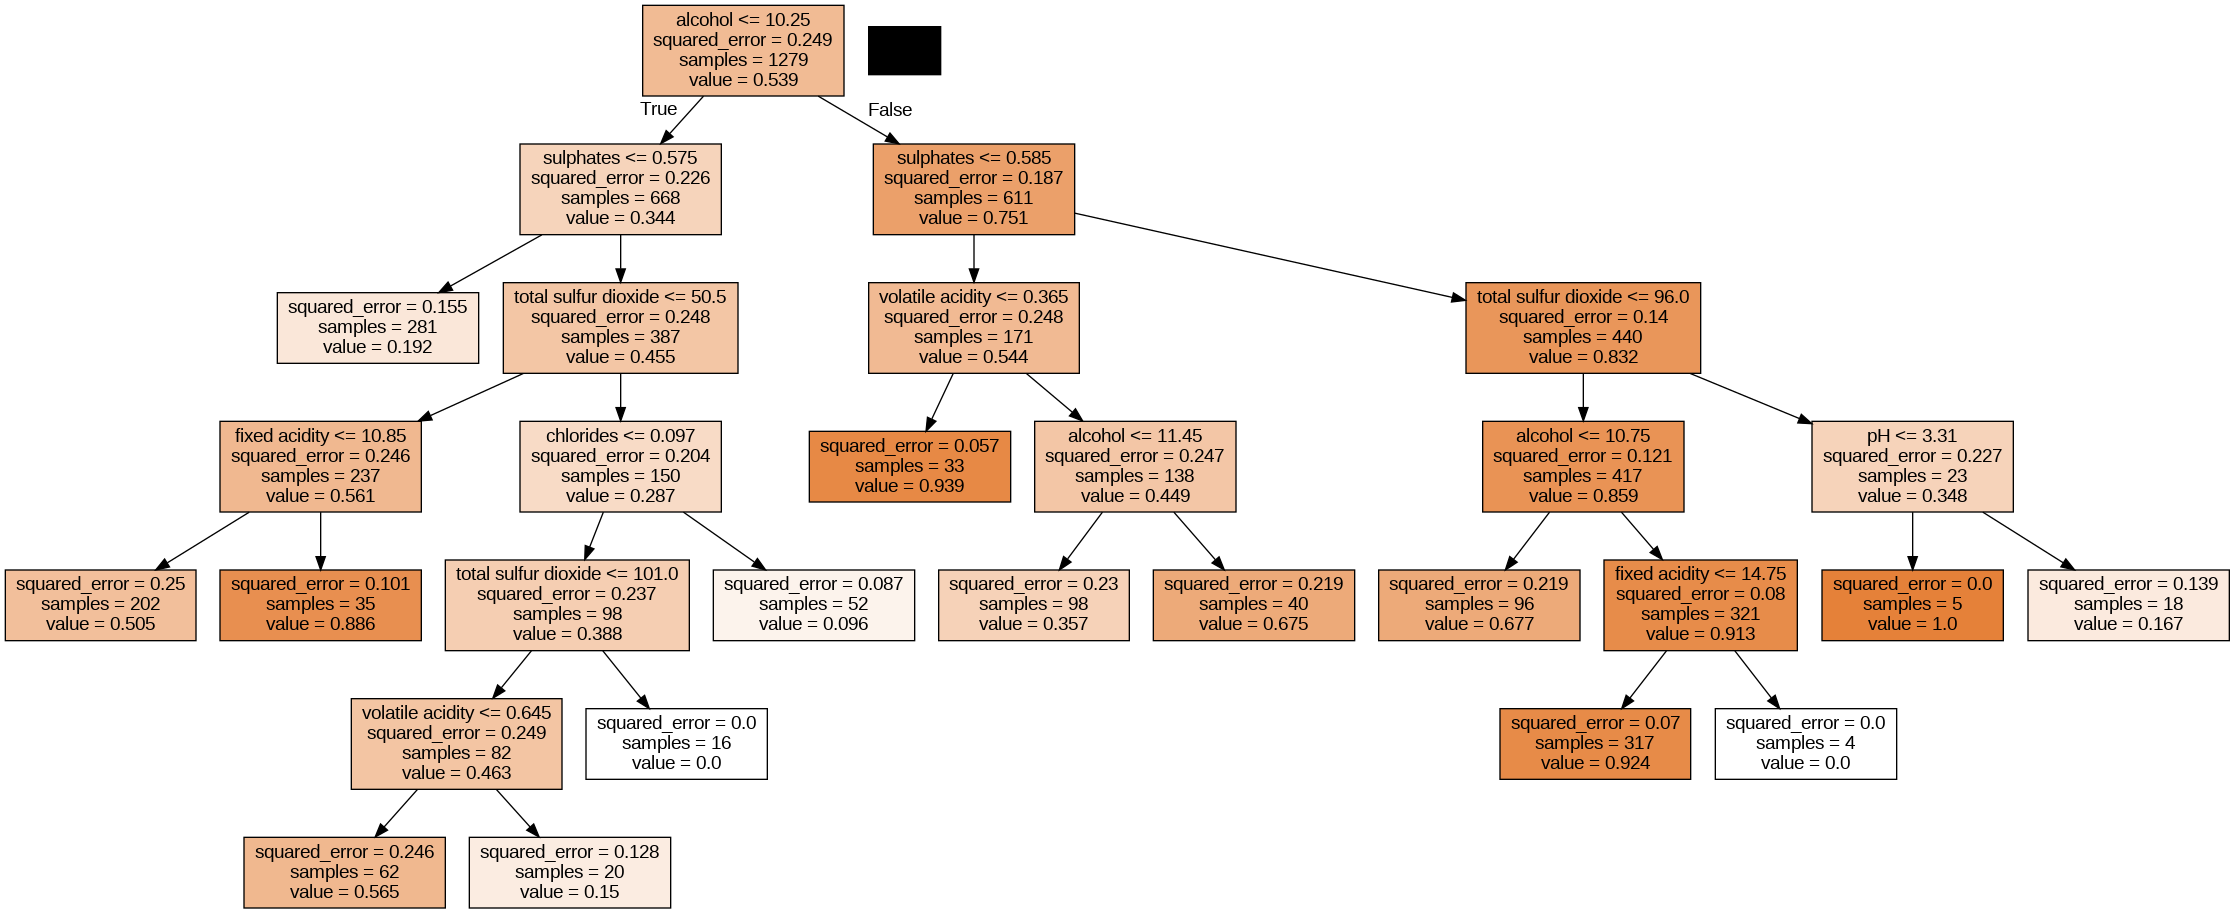

In [ ]:
wine_tree = DecisionTreeRegressor(min_samples_split=5,min_impurity_decrease=0.002)
wine_tree.fit(X_train, y_train)
graph, = print_tree(wine_tree, features= train.drop(columns = ['quality']).columns)
Image(graph.create_png())

In [ ]:
wine_tree_preds = wine_tree.predict(X_test)

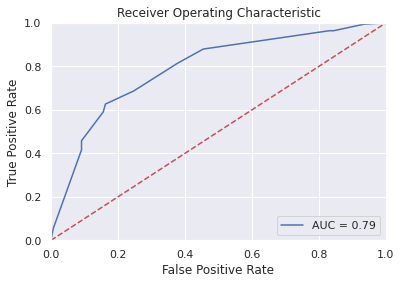

In [ ]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_tree_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Random Forest

In [ ]:
import graphviz
import pydot
from io import StringIO  

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

In [ ]:
df = pd.read_csv('Dataset/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'] = df['quality'].replace({3:0, 4:0, 5:0, 6:1, 7:1, 8:1})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
y_train = train['quality']
X_train = train.drop(columns = ['quality'])
y_test = test['quality']
X_test = test.drop(columns = ['quality'])

In [ ]:
wine_rf = RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=1)
wine_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=1)

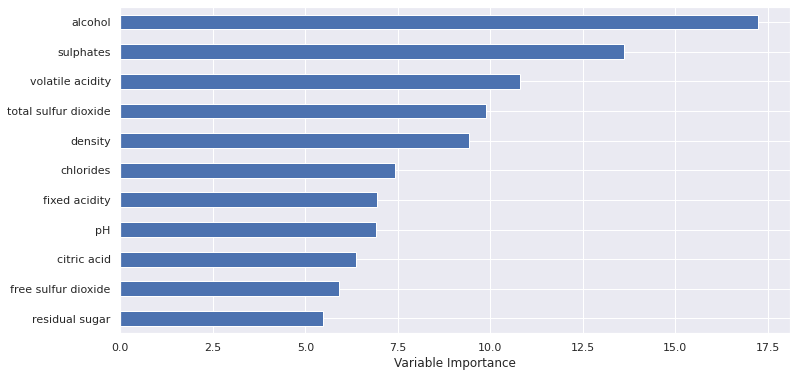

In [ ]:
Importance_ = pd.DataFrame({'Importance':wine_rf.feature_importances_*100}, index=X_train.columns)
Importance = Importance_.sort_values('Importance', axis=0, ascending=False)[0:20]
Importance.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

We can see the importance of each column in descending order, and the “alcohol” surpasses the others a lot.

In [ ]:
wine_rf_preds = wine_rf.predict_proba(X_test)

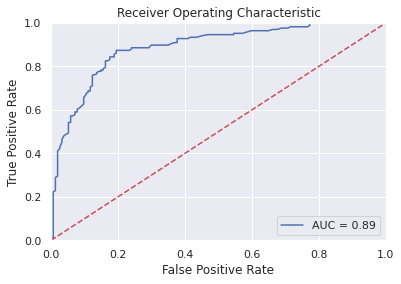

In [ ]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_rf_preds[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The graph below shows ROC curve and AUC value. According to AUC (0.89), we can understand the predictive accuracy of this model is high.

In [ ]:
confusion_matrix(test['quality'], (wine_rf_preds[:,1] > 0.5))

array([[127,  27],
       [ 26, 140]])

##Gradient Boosting

In [ ]:
wine_boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05,random_state=1)
wine_boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000,
                           random_state=1)

alcohol                 30.183502
sulphates               13.534613
total sulfur dioxide    11.794721
volatile acidity         9.765695
pH                       6.563686
chlorides                6.531657
fixed acidity            5.161703
density                  5.060394
citric acid              4.000996
free sulfur dioxide      3.931732
residual sugar           3.471303
dtype: float64


Text(0.5, 0, 'Variable Importance')

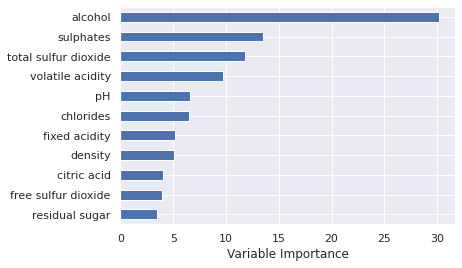

In [ ]:
feature_importance = wine_boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X_train.columns).sort_values(ascending=False, inplace=False)
rel_imp = rel_imp[0:20]
print(rel_imp)
rel_imp.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance')

We generated the same graph to see the importance of every parameter. Compared with the graph of the Random Forest model, we can observe that “alcohol” still takes first place, but in boosting model the gap is larger, and the “sulphates” influence less in “Quality”.

In [ ]:
wine_boost_preds = wine_boost.predict_proba(X_test)

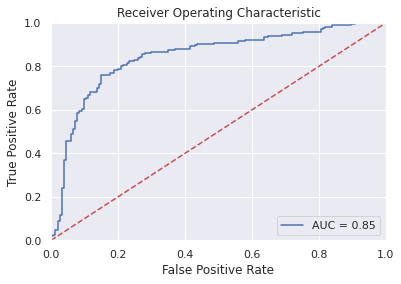

In [ ]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_boost_preds[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Similarly, we plotted the ROC curve and AUC for the boosting model for better comparison. From the graph below, we knew the AUC value of the boosting model is 0.85, which is slightly lower than the Random Forest model’s value (0.89). 

In [ ]:
confusion_matrix(test['quality'], (wine_boost_preds[:,1] > 0.5))

array([[122,  32],
       [ 34, 132]])

##Ensemble of Tree, Random Forest, and Boosting Model

In [ ]:
wine_boost_ens = ( wine_tree_preds + wine_rf_preds[:,1] + wine_boost_preds[:,1] )/3

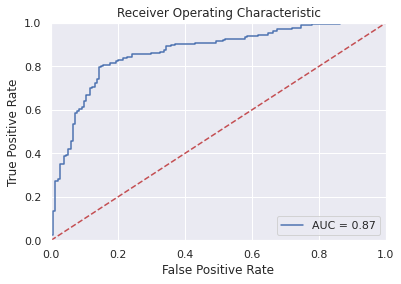

In [ ]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_boost_ens)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We combine Decision Tree, Random Forest, and Boosting Models together, and its  AUC value is 0.87, however, it still cannot outperform the performance of the Random Forest Model.

In [ ]:
confusion_matrix(test['quality'], (wine_boost_ens > 0.5))

array([[128,  26],
       [ 32, 134]])

##Neural Network

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('Dataset/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'] = df['quality'].replace({3:0, 4:0, 5:0, 6:1, 7:1, 8:1})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
y_train = train['quality']
X_train = train.drop(columns = ['quality'])
y_test = test['quality']
X_test = test.drop(columns = ['quality'])

In [ ]:
inputs = keras.Input(shape=(11,))
x = layers.Dense(6, activation="relu", name="dense_1")(inputs)
x = layers.Dense(5, activation="relu", name="dense_2")(x)
x = layers.Dense(4, activation="sigmoid", name="dense_3")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
wine_nnet = keras.Model(inputs=inputs, outputs=outputs)
wine_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [ ]:
history = wine_nnet.fit(
  X_train,
  y_train,
  batch_size=32,
  epochs=50,
  validation_split=0.05
)

Epoch 1/50
38/38 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5169 - val_loss: 0.6929 - val_accuracy: 0.5156
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5407 - val_loss: 0.6923 - val_accuracy: 0.5156
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5399 - val_loss: 0.6917 - val_accuracy: 0.5156
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5399 - val_loss: 0.6907 - val_accuracy: 0.5156
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5399 - val_loss: 0.6869 - val_accuracy: 0.5156
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5399 - val_loss: 0.6862 - val_accuracy: 0.5156
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5399 - val_loss: 0.6847 - val_accuracy: 0.5156
Epoch 8/50
38/38 [==

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [ ]:
wine_nnet_preds = wine_nnet.predict(X_test)

10/10 [==============================] - 0s 1ms/step


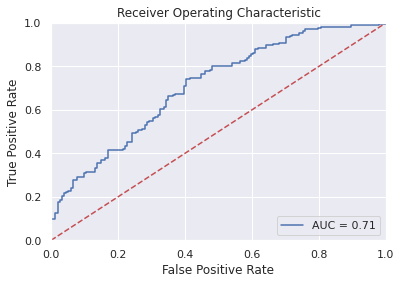

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, wine_nnet_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We tried to run a deep learning model to see whether it will transcend the Random Forest Model. In the end, the result (0.71) was even worse than Logistic Regression Model (0.74).

##K-Means

In [ ]:
from sklearn.preprocessing import MinMaxScaler # For rescaling metrics to fit 0 to 1 range
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from sklearn.metrics import pairwise_distances

In [ ]:
df = pd.read_csv('Dataset/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We scaled our original data into the range (0,1) using MinMaxScaler() function.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
df_sc = scaler.transform(df)
df_sc = pd.DataFrame(data = df_sc, columns = df.columns)
df_sc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


<AxesSubplot:>

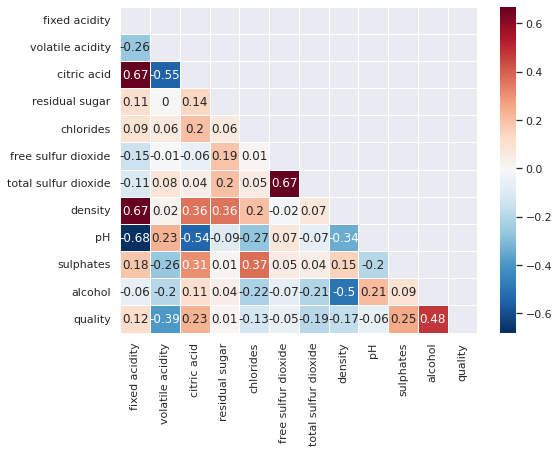

In [ ]:
corr = round(df_sc.corr(), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap = 'RdBu_r', linewidths = 0.8, mask = mask, annot = True)

<function matplotlib.pyplot.show(close=None, block=None)>

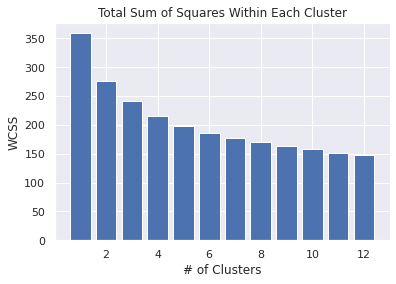

In [ ]:
plt.figure(figsize = (6,4))
wcss = []
for i in range(1,13):
  kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 123)
  kmeans.fit(df_sc)
  wcss.append(kmeans.inertia_)
plt.bar(range(1,13), wcss)
plt.title('Total Sum of Squares Within Each Cluster')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show

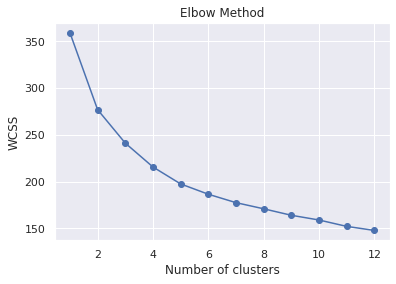

In [ ]:
plt.plot(range(1, 13), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

After pre-processing the data, let’s cluster it. We used K means and found out K=5 is our best clustering data based on the Elbow Method.

In [ ]:
# Initialize model and fit the wine data
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 1000, n_init=10, random_state = 1)
kmeans.fit(df_sc)
centroids = kmeans.cluster_centers_

In [ ]:
label = kmeans.fit_predict(df_sc)
label

array([4, 4, 4, ..., 2, 2, 0], dtype=int32)

In [ ]:
# All rows of the wine data that belong to the 1st cluster center/centroid
filtered_label0 = df_sc[label == 0]
filtered_label0.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,0.345133,0.109589,0.56,0.061644,0.133556,0.478873,0.342756,0.501468,0.440945,0.251497,0.323077,0.8
37,0.309735,0.178082,0.28,0.082192,0.090150,0.169014,0.084806,0.494126,0.385827,0.239521,0.200000,0.8
84,0.150442,0.123288,0.48,0.061644,0.095159,0.239437,0.194346,0.428047,0.551181,0.269461,0.292308,0.6


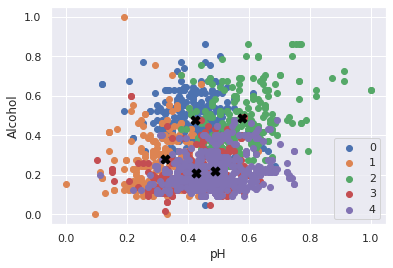

In [ ]:
plt.figure(figsize = (6,4))
num_clusters = np.unique(label)
for i in num_clusters:
  plt.scatter(df_sc.iloc[label == i, 8],df_sc.iloc[label ==i, 10], label = i)
plt.scatter(centroids[:,8], centroids[:,10], s = 80, color = 'black', marker = 'X')
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

After visualizing our clusters, it can be seen that they are not well separated and clusters 1, 3, and 4 are overlapped mostly.

Let’s see the silhouette score. The silhouette score ranges from -1 to 1, and generally speaking, the higher the silhouette score means the better the clustering. However, the silhouette score we obtained from our model is 0.181, it’s nearly 0, which means our clusters are overlapped and close to the neighboring clusters.

In [ ]:
# Evaluate model
metrics.silhouette_score(df_sc, label, metric='euclidean')

0.179854912662819

The silhouette score obtained is considered low. It means clusters are neither dense nor well separated.

##PCA

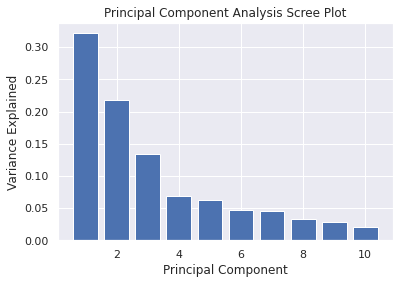

In [ ]:
plt.figure(figsize=(6,4))
pca = PCA(n_components=10)
pca_fit = pca.fit(df_sc)
pc_values = np.arange(pca_fit.n_components_) + 1
plt.bar(pc_values, pca.explained_variance_ratio_)
plt.title('Principal Component Analysis Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca_1 = PCA(n_components = 0.80)
pca_1.fit(df_sc)
reduced = pca_1.transform(df_sc)

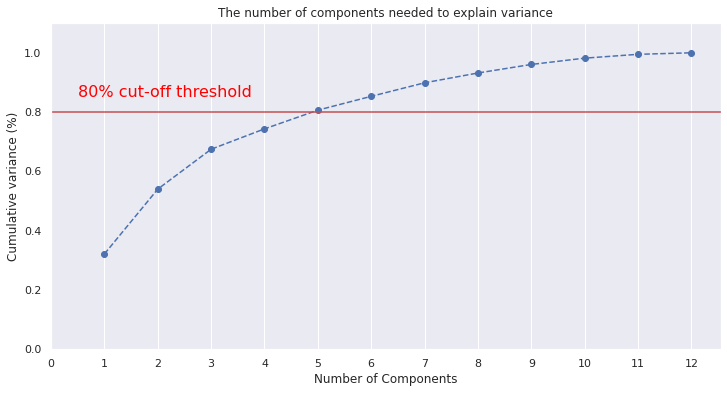

In [ ]:
pca_1 = PCA().fit(df_sc)

#% matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 13, step=1)
y = np.cumsum(pca_1.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 13, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

The cumulative sum of 5 principal components seems to account for about 80% of our variation, which I would say is good enough.

In [ ]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(df_sc)
pcDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4', 'PC5'])
pcDF.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.308010,-0.198750,-0.157373,0.083623,-0.002606
1,-0.265056,-0.237308,0.057130,0.098049,0.061870
2,-0.222379,-0.191181,-0.065895,0.053514,0.024600
3,0.424268,-0.057361,0.042600,-0.024394,-0.072649
4,-0.308010,-0.198750,-0.157373,0.083623,-0.002606


In [ ]:
print(pca.explained_variance_ratio_.sum())

0.8065094095707298


In [ ]:
print(pca.explained_variance_ratio_)

[0.32159114 0.21863498 0.13452039 0.0686816  0.0630813 ]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


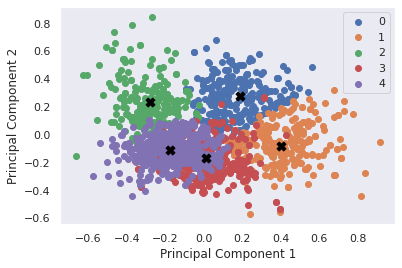

In [ ]:
plt.figure(figsize = (6,4))
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 1000, random_state = 123)
label_pca = kmeans.fit_predict(pcDF)
num_clusters_pca = np.unique(label_pca)
centroids = kmeans.cluster_centers_
for i in num_clusters_pca:
  plt.scatter(pcDF.iloc[label == i, 0],pcDF.iloc[label == i, 1], label = i)
plt.scatter(centroids[:,0], centroids[:,1], s = 80, color = 'black', marker = 'X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

We plotted a scatter plot of our new K mean model (with PCA), and we were able to see clusters are more separated.

In [ ]:
# Evaluate model
metrics.silhouette_score(pcDF, label_pca, metric='euclidean')

0.23971955488671237

The silhouette score of this new model is about 0.24, which is better than our original one.